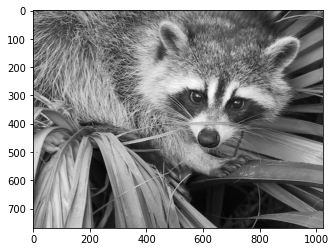

In [73]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc # Load an image

face = misc.face(gray=True) 
plt.imshow(face, cmap=plt.cm.gray)
plt.show() 

In [74]:
face.shape, np.min(face), np.max(face)

((768, 1024), 0, 250)

In [75]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

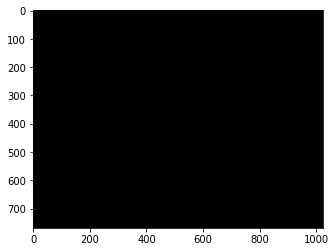

In [76]:
new_img = np.zeros((768, 1024))
plt.imshow(new_img, cmap=plt.cm.gray)
plt.show() 

#### shift

In [77]:
def img_shift(img, row, col):
    import numpy as np
    img_row = img.shape[0]
    img_col = img.shape[1]
    
    new_img = np.zeros((img_row, img_col))
    new_img[row:, col:] = img[:-row, :-col]
    
    return new_img

In [78]:
shifted_face = img_shift(face, 50, 50)
shifted_face

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 107., 109., 109.],
       [  0.,   0.,   0., ..., 108., 110., 110.],
       [  0.,   0.,   0., ..., 106., 109., 108.]])

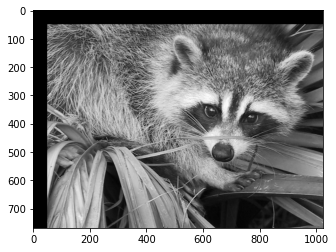

In [79]:
plt.imshow(shifted_face, cmap = plt.cm.gray)
plt.show()

#### rotate
* 이미지 회전 알고리즘 <br>
  P(x,y)를 각도 $\theta$ 만큼 반시계방향으로 회전하면 아래와 같이 $P'(xcos(\theta)-ysin(\theta), xsin(\theta)+ycos(\theta)) $ 이 된다. 
  
  이를 행렬로 나타내면 
  
   $$
   \begin{equation*}
   \left(\begin{array}{cc} x'\\
                           y'\end{array}\right) = 
   \left(\begin{array}{cc} cos \theta & -sin \theta \\
                           sin \theta & cos \theta \end{array}\right)
   \left(\begin{array}{cc} x\\
                           y\end{array}\right)                        
\end{equation*}  $$

  이를 변환된 이미지 기준으로 변형하면 아래와 같이 변환하면 된다. 

  $$
   \begin{equation*}
   \left(\begin{array}{cc} x\\
                           y\end{array}\right) = 
   \left(\begin{array}{cc} cos \theta & sin \theta \\
                           -sin \theta & cos \theta \end{array}\right)
   \left(\begin{array}{cc} x'\\
                           y'\end{array}\right)                        
\end{equation*}  $$
![rotate](https://drive.google.com/uc?id=1b7i7ksCtk_MIMLmqMb6KMEk4WxMp-5t4)

In [80]:
def img_rotate(img, angle):
    import numpy as np
    img_row = img.shape[0] # y
    img_col = img.shape[1] # x
    angle_cos = np.cos(angle)
    angle_sin = np.sin(angle)

    new_img = np.zeros((int((img_col * angle_sin) + (img_row * angle_cos)), int((img_col * angle_cos) - (img_row * angle_sin))))
    print(new_img)

    # for i in range(img.shpae[0]):
    #     for j in range(img.shpae[1]):
    #         newimg[i, j]

In [81]:
img_rotate(face, 30)

ValueError: ignored

#### crop

In [82]:
def img_crop(img, row_start, row_end, col_start, col_end):
    new_img = img[row_start:row_end, col_start:col_end]
    return new_img

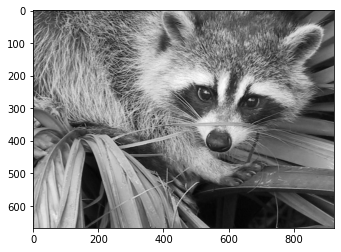

In [83]:
cropped_face = img_crop(face, 50, -50, 50, -50)
plt.imshow(cropped_face, cmap = plt.cm.gray)
plt.show()

#### zoom

In [84]:
def img_zoom(img, magni):
    import numpy as np
    from scipy.interpolate import interp1d
    new_row = img.shape[0] * magni
    new_col = img.shape[1] * magni
    new_img = np.zeros((new_row, new_col))
    new_img[::magni, ::magni] = img
    
    for i in range(0, new_row+1, magni):

        x = np.arange(0, new_row, magni)
        y = img[i,:]
        linear_interp = interp1d(x, y)
        interpolation_x = np.arange(0, new_row)
        linear_results = linear_interp(interpolation_x)
        new_img[i, :] = linear_results
    
    print(new_img)

In [91]:
face.shape, face[767, :]

((768, 1024), array([ 94, 106, 119, ..., 142, 141, 140], dtype=uint8))

In [256]:
def img_zoom(img, magni):
    import numpy as np
    from scipy.interpolate import interp1d

    for i in range(img.shape[0]):
        col_x = np.arange(0, (img.shape[1]*2), 2)
        col_y = img[i, :]
        col_interp = interp1d(col_x, col_y)
        interpolation_col = np.arange(0, img.shape[1]*2 - 1)
        interpolation_results = col_interp(interpolation_col)
        interpolation_results = np.append(interpolation_results, [interpolation_results[-1]], axis = 0)
        if i == 0:
            temp_img = np.array([interpolation_results])
        else:
            temp_img = np.r_[temp_img, [interpolation_results]]

    for i in range(img.shape[1]):
        row_x = np.arange(0, (temp_img.shape[0]*2), 2)
        row_y = temp_img[:, i]
        row_interp = interp1d(row_x, row_y)
        interpolation_row = np.arange(0, temp_img.shape[0]*2 - 1)
        interpolation_results = row_interp(interpolation_row)
        interpolation_results = np.append(interpolation_results, [interpolation_results[-1]], axis = 0)
        if i == 0:
            new_img = np.array([interpolation_results])
        else:
            new_img = np.r_[new_img, [interpolation_results]]
    
    return new_img, new_img.shape

In [257]:
img_zoom(face, 2)

(array([[114.  ,  98.5 ,  83.  , ...,  94.  ,  94.  ,  94.  ],
        [122.  , 107.75,  93.5 , ...,  99.5 , 100.  , 100.  ],
        [130.  , 117.  , 104.  , ..., 105.  , 106.  , 106.  ],
        ...,
        [141.5 , 141.25, 141.  , ..., 120.  , 121.  , 121.  ],
        [138.  , 137.  , 136.  , ..., 120.  , 121.  , 121.  ],
        [120.  , 119.5 , 119.  , ..., 118.75, 119.  , 119.  ]]), (1024, 1536))

In [255]:
col_x = np.arange(0, (face.shape[1]*2), 2)
col_y = face[0, :]
col_interp = interp1d(col_x, col_y)
interpolation_col = np.arange(0, face.shape[1]*2 - 1)
interpolation_results = col_interp(interpolation_col)
interpolation_results = np.append(interpolation_results, [interpolation_results[-1]], axis = 0)
interpolation_results, interpolation_results.shape
# temp_img = np.r_[temp_img, [col_interp(interpolation_col)]]
# my = np.append(my, [my[-1]], axis = 0)

(array([114., 122., 130., ..., 133., 137., 137.]), (2048,))

In [252]:
row_x = np.arange(0, (face.shape[0]*2), 2)
row_y = face[:, 0]
row_interp = interp1d(row_x, row_y)
interpolation_row = np.arange(0, face.shape[0]*2 - 1)
interpolation_results = row_interp(interpolation_row)
interpolation_results = np.append(interpolation_results, [interpolation_results[-1]], axis = 0)
interpolation_results, interpolation_results.shape

(array([114. ,  98.5,  83. , ...,  94. ,  94. ,  94. ]), (1536,))

In [225]:
type(face[0,-1])

numpy.uint8

In [209]:
len(np.arange(0, face.shape[1]*2))

2048

In [187]:
import numpy as np
six = np.array([4,5,6])
test = np.array([six])
new = np.array([1,2,3])
test = np.r_[test, [new]]
test

array([[4, 5, 6],
       [1, 2, 3]])

In [186]:
new2 = np.array([7,8,9])
test = np.r_[test, [new2]]
test

array([[4, 5, 6],
       [1, 2, 3],
       [7, 8, 9]])

In [174]:
test

array([4., 5., 6., 4., 5., 6.])

In [137]:
tes = np.array([[1,2,3], [4,5,6]])
new = np.array([7,8])
tes = np.c_[tes, new]
tes

array([[1, 2, 3, 7],
       [4, 5, 6, 8]])

In [235]:
my = np.array([4,5,6])

my = np.append(my, [my[-1]], axis = 0)

In [236]:
my

array([4, 5, 6, 6])

In [250]:
sie = np.array([[1,2,3], [4,5,6]])
sie

array([[1, 2, 3],
       [4, 5, 6]])

In [251]:
sie = sie.T
sie

array([[1, 4],
       [2, 5],
       [3, 6]])

rotate와 zoom을 계속 시도해봤는데 실패해서 우선 과제 제출합니다!
이번주에 좀더 고민해보고 안되면 질문하겠습니다 ㅠㅠ 감사합니다!